# Data Wrangling, Part 2

## Cleaning up the data

In [1]:
import pandas as pd
df = pd.read_csv('book_code/ch_03/data/nyc_temperatures.csv')
df.head()

,attributes,datatype,date,station,value
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6
2,",,W,2400",TMIN,2018-10-01T00:00:00,GHCND:USW00014732,18.3
3,"H,,S,",TAVG,2018-10-02T00:00:00,GHCND:USW00014732,22.7
4,",,W,2400",TMAX,2018-10-02T00:00:00,GHCND:USW00014732,26.1


In [2]:
df.columns

Index(['attributes', 'datatype', 'date', 'station', 'value'], dtype='object')

In [3]:
df.rename(columns={'value': 'temp_C', 'attributes': 'flags'}, inplace=True)
df.columns

Index(['flags', 'datatype', 'date', 'station', 'temp_C'], dtype='object')

## Type conversion

In [4]:
df.dtypes

flags        object
datatype     object
date         object
station      object
temp_C      float64
dtype: object

In [5]:
df.loc[:,'date'] = pd.to_datetime(df.date)
df.dtypes

flags               object
datatype            object
date        datetime64[ns]
station             object
temp_C             float64
dtype: object

In [6]:
df.date.describe()

/var/folders/rk/qwqd81bx00b1rl2fj8gy_vnc0000gn/T/ipykernel_14293/3205001224.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                      93
unique                     31
top       2018-10-01 00:00:00
freq                        3
first     2018-10-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [7]:
eastern = pd.read_csv('book_code/ch_03/data/nyc_temperatures.csv', index_col='date', parse_dates=True).tz_localize('EST')
eastern.head()

,attributes,datatype,station,value
date,,,,
2018-10-01 00:00:00-05:00,"H,,S,",TAVG,GHCND:USW00014732,21.2
2018-10-01 00:00:00-05:00,",,W,2400",TMAX,GHCND:USW00014732,25.6
2018-10-01 00:00:00-05:00,",,W,2400",TMIN,GHCND:USW00014732,18.3
2018-10-02 00:00:00-05:00,"H,,S,",TAVG,GHCND:USW00014732,22.7
2018-10-02 00:00:00-05:00,",,W,2400",TMAX,GHCND:USW00014732,26.1


In [8]:
eastern.tz_convert('UTC').head()

,attributes,datatype,station,value
date,,,,
2018-10-01 05:00:00+00:00,"H,,S,",TAVG,GHCND:USW00014732,21.2
2018-10-01 05:00:00+00:00,",,W,2400",TMAX,GHCND:USW00014732,25.6
2018-10-01 05:00:00+00:00,",,W,2400",TMIN,GHCND:USW00014732,18.3
2018-10-02 05:00:00+00:00,"H,,S,",TAVG,GHCND:USW00014732,22.7
2018-10-02 05:00:00+00:00,",,W,2400",TMAX,GHCND:USW00014732,26.1


In [9]:
# A more flexible approach to type conversion: using `.assign()`. (I also need practice with lambda functions.
eastern = pd.read_csv('book_code/ch_03/data/nyc_temperatures.csv', index_col='date', parse_dates=True).rename(columns={'value':'temp_C', 'attributes':'flags'})
new_df = df.assign(date=pd.to_datetime(df.date), temp_F=lambda x: (x.temp_C * 9/5)+32)
new_df.dtypes

flags               object
datatype            object
date        datetime64[ns]
station             object
temp_C             float64
temp_F             float64
dtype: object

In [10]:
new_df.head()

,flags,datatype,date,station,temp_C,temp_F
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,70.16
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,78.08
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,64.94
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,72.86
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,78.98


In [11]:
# `astype()` converts one column at a time.
df = df.assign(date=pd.to_datetime(df.date),
               temp_C_whole=lambda x: x.temp_C.astype('int'),
               temp_F=lambda x: (x.temp_C * 9/5) + 32,
               temp_F_whole=lambda x: x.temp_F.astype('int'))
df.head()

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,70.16,70
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,18,64.94,64
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,72.86,72
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78


In [12]:
df_with_categories = df.assign(station=df.station.astype('category'), datatype=df.datatype.astype('category'))
df_with_categories.dtypes

flags                   object
datatype              category
date            datetime64[ns]
station               category
temp_C                 float64
temp_C_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

In [13]:
df_with_categories.describe(include='category')

,datatype,station
count,93,93
unique,3,1
top,TAVG,GHCND:USW00014732
freq,31,93


## Reordering, reindexing, and sorting data

In [14]:
df.sort_values(by='temp_C', ascending=False).head(10)

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
19,",,W,2400",TMAX,2018-10-07,GHCND:USW00014732,27.8,27,82.04,82
28,",,W,2400",TMAX,2018-10-10,GHCND:USW00014732,27.8,27,82.04,82
31,",,W,2400",TMAX,2018-10-11,GHCND:USW00014732,26.7,26,80.06,80
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78
10,",,W,2400",TMAX,2018-10-04,GHCND:USW00014732,26.1,26,78.98,78
25,",,W,2400",TMAX,2018-10-09,GHCND:USW00014732,25.6,25,78.08,78
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
7,",,W,2400",TMAX,2018-10-03,GHCND:USW00014732,25.0,25,77.00,77
27,"H,,S,",TAVG,2018-10-10,GHCND:USW00014732,23.8,23,74.84,74
30,"H,,S,",TAVG,2018-10-11,GHCND:USW00014732,23.4,23,74.12,74


In [15]:
df.sort_values(by=['temp_C','date'], ascending=False).head(10)

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
28,",,W,2400",TMAX,2018-10-10,GHCND:USW00014732,27.8,27,82.04,82
19,",,W,2400",TMAX,2018-10-07,GHCND:USW00014732,27.8,27,82.04,82
31,",,W,2400",TMAX,2018-10-11,GHCND:USW00014732,26.7,26,80.06,80
10,",,W,2400",TMAX,2018-10-04,GHCND:USW00014732,26.1,26,78.98,78
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78
25,",,W,2400",TMAX,2018-10-09,GHCND:USW00014732,25.6,25,78.08,78
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
7,",,W,2400",TMAX,2018-10-03,GHCND:USW00014732,25.0,25,77.00,77
27,"H,,S,",TAVG,2018-10-10,GHCND:USW00014732,23.8,23,74.84,74
30,"H,,S,",TAVG,2018-10-11,GHCND:USW00014732,23.4,23,74.12,74


In [16]:
df.nlargest(5, 'temp_C')

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
19,",,W,2400",TMAX,2018-10-07,GHCND:USW00014732,27.8,27,82.04,82
28,",,W,2400",TMAX,2018-10-10,GHCND:USW00014732,27.8,27,82.04,82
31,",,W,2400",TMAX,2018-10-11,GHCND:USW00014732,26.7,26,80.06,80
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78
10,",,W,2400",TMAX,2018-10-04,GHCND:USW00014732,26.1,26,78.98,78


In [17]:
df.sample(5, random_state=0).index

Int64Index([2, 30, 55, 16, 13], dtype='int64')

In [18]:
df.sample(5, random_state=0).sort_index().index

Int64Index([2, 13, 16, 30, 55], dtype='int64')

In [19]:
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


In [20]:
# `reset_index()` moves the old index to a new column and resets the index.
df[df.datatype == 'TAVG'].head().reset_index()

,index,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,70.16,70
1,3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,72.86,72
2,6,"H,,S,",TAVG,2018-10-03,GHCND:USW00014732,21.8,21,71.24,71
3,9,"H,,S,",TAVG,2018-10-04,GHCND:USW00014732,21.3,21,70.34,70
4,12,"H,,S,",TAVG,2018-10-05,GHCND:USW00014732,20.3,20,68.54,68


In [21]:
df.set_index('date', inplace=True)
df.head()

,flags,datatype,station,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,"H,,S,",TAVG,GHCND:USW00014732,21.2,21,70.16,70
2018-10-01,",,W,2400",TMAX,GHCND:USW00014732,25.6,25,78.08,78
2018-10-01,",,W,2400",TMIN,GHCND:USW00014732,18.3,18,64.94,64
2018-10-02,"H,,S,",TAVG,GHCND:USW00014732,22.7,22,72.86,72
2018-10-02,",,W,2400",TMAX,GHCND:USW00014732,26.1,26,78.98,78


In [22]:
df['2018-10-11' : '2018-10-12']

,flags,datatype,station,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,"H,,S,",TAVG,GHCND:USW00014732,23.4,23,74.12,74
2018-10-11,",,W,2400",TMAX,GHCND:USW00014732,26.7,26,80.06,80
2018-10-11,",,W,2400",TMIN,GHCND:USW00014732,21.7,21,71.06,71
2018-10-12,"H,,S,",TAVG,GHCND:USW00014732,18.3,18,64.94,64
2018-10-12,",,W,2400",TMAX,GHCND:USW00014732,22.2,22,71.96,71
2018-10-12,",,W,2400",TMIN,GHCND:USW00014732,12.2,12,53.96,53


In [23]:
df['2018-10']

/var/folders/rk/qwqd81bx00b1rl2fj8gy_vnc0000gn/T/ipykernel_14293/4131554638.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018-10']


,flags,datatype,station,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,"H,,S,",TAVG,GHCND:USW00014732,21.2,21,70.16,70
2018-10-01,",,W,2400",TMAX,GHCND:USW00014732,25.6,25,78.08,78
2018-10-01,",,W,2400",TMIN,GHCND:USW00014732,18.3,18,64.94,64
2018-10-02,"H,,S,",TAVG,GHCND:USW00014732,22.7,22,72.86,72
2018-10-02,",,W,2400",TMAX,GHCND:USW00014732,26.1,26,78.98,78
...,...,...,...,...,...,...,...
2018-10-30,",,W,2400",TMAX,GHCND:USW00014732,13.9,13,57.02,57
2018-10-30,",,W,2400",TMIN,GHCND:USW00014732,7.2,7,44.96,44
2018-10-31,"H,,S,",TAVG,GHCND:USW00014732,12.6,12,54.68,54


In [24]:
sp = pd.read_csv('book_code/ch_03/data/sp500.csv', index_col='date', parse_dates=True).drop(columns='adj_close')
sp.head(10).assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


In [25]:
bitcoin = pd.read_csv('book_code/ch_03/data/bitcoin.csv', index_col='date', parse_dates=True).drop(columns='market_cap')

# Every day's closing price = S&P 500 + Bitcoin close (and same for other metrics)
portfolio = pd.concat([sp, bitcoin], sort=False).groupby(pd.Grouper(freq='D')).sum()
portfolio.head(10).assign(day_of_week = lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


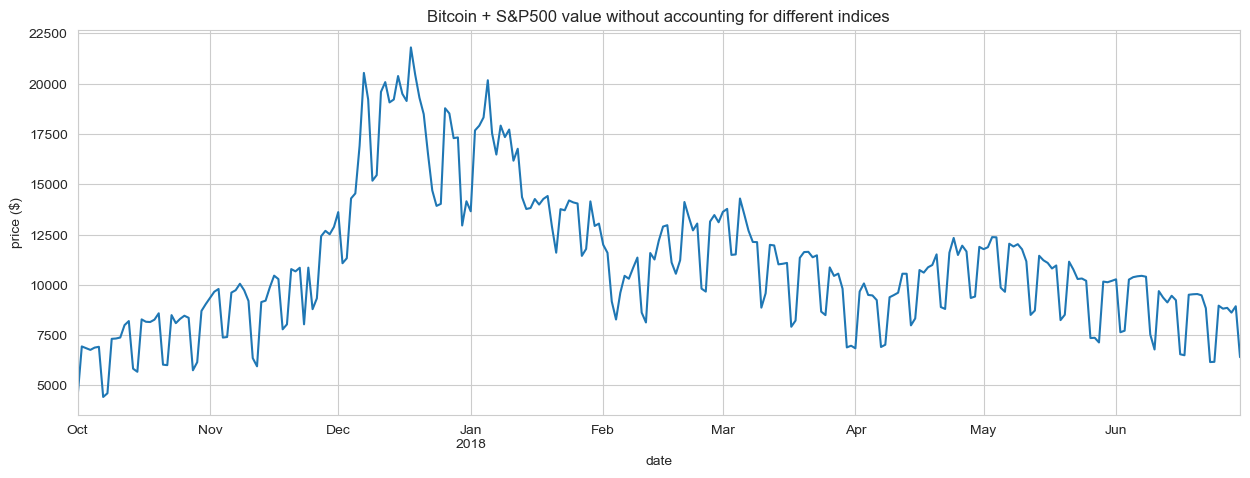

In [26]:
import matplotlib.pyplot as plt

portfolio['2017-Q4':'2018-Q2'].plot(y='close', figsize=(15,5), legend=False, title='Bitcoin + S&P500 value without accounting for '
                                                                                   'different indices')
plt.ylabel('price ($)')
plt.show()

In [27]:
# Problem: the price drops on weekends because there is no S&P500 data on those days. We can use `.reindex()` method.
sp.reindex(bitcoin.index, method='ffill').head(10).assign(day_of_week = lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [28]:
# np.where() is vectorized; if...then is not. Always opt for vectorized operations.
import numpy as np

sp_reindexed = sp.reindex(bitcoin.index).assign(
    # Put 0 when market is closed
    volume = lambda x: x.volume.fillna(0),
    close = lambda x: x.close.fillna(method='ffill'),
    # Use the closing price when any of the following aren't available
    open = lambda x: np.where(x.open.isnull(), x.close, x.open),
    high = lambda x: np.where(x.high.isnull(), x.close, x.high),
    low = lambda x: np.where(x.low.isnull(), x.close, x.low)
)

sp_reindexed.head(10).assign(day_of_week = lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


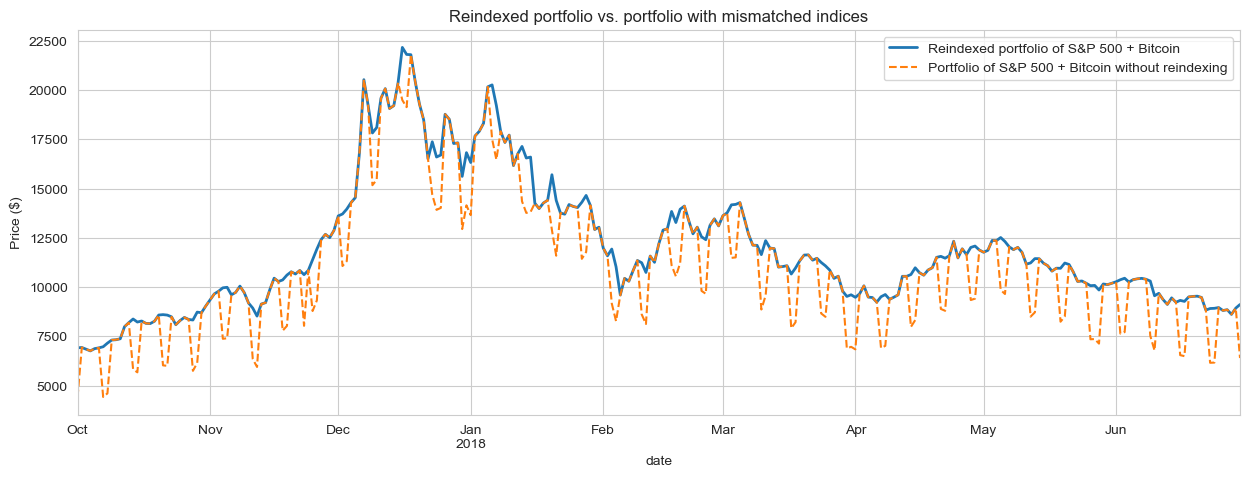

In [29]:
# Every day's closing price = S&P 500 close adjusted for market closure + Bitcoin close (same for other metrics)
fixed_portfolio = pd.concat([sp_reindexed, bitcoin], sort=False).groupby(pd.Grouper(freq='D')).sum()

ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', label='Reindexed portfolio of S&P 500 + Bitcoin',
    figsize=(15,5), linewidth=2, title='Reindexed portfolio vs. portfolio with mismatched indices'
)

portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', ax=ax, linestyle='--',
    label='Portfolio of S&P 500 + Bitcoin without reindexing'
).set_ylabel('Price ($)')

plt.show()

## Restructuring the Data

In [30]:
long_df = pd.read_csv('book_code/ch_03/data/long_data.csv', usecols=['date', 'datatype', 'value']).rename(columns={'value':'temp_C'}).assign(date=lambda x: pd.to_datetime(x.date), temp_F=lambda x: (x.temp_C * 9/5) + 32)
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [31]:
long_df.T

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
datatype,TMAX,TMIN,TOBS,TMAX,TMIN,TOBS,TMAX,TMIN,TOBS,TMAX,...,TOBS,TMAX,TMIN,TOBS,TMAX,TMIN,TOBS,TMAX,TMIN,TOBS
date,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-01 00:00:00,2018-10-02 00:00:00,2018-10-02 00:00:00,2018-10-02 00:00:00,2018-10-03 00:00:00,2018-10-03 00:00:00,2018-10-03 00:00:00,2018-10-04 00:00:00,...,2018-10-28 00:00:00,2018-10-29 00:00:00,2018-10-29 00:00:00,2018-10-29 00:00:00,2018-10-30 00:00:00,2018-10-30 00:00:00,2018-10-30 00:00:00,2018-10-31 00:00:00,2018-10-31 00:00:00,2018-10-31 00:00:00
temp_C,21.1,8.9,13.9,23.9,13.9,17.2,25.0,15.6,16.1,22.8,...,7.2,10.6,6.7,8.3,13.3,2.2,5.0,12.2,0.0,0.0
temp_F,69.98,48.02,57.02,75.02,57.02,62.96,77.0,60.08,60.98,73.04,...,44.96,51.08,44.06,46.94,55.94,35.96,41.0,53.96,32.0,32.0


## Pivoting a DataFrame
Pivot to go from long- to wide-form data.

In [32]:
pivoted_df = long_df.pivot(index='date', columns='datatype', values='temp_C')
pivoted_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


In [33]:
pivoted_df.describe()

datatype,TMAX,TMIN,TOBS
count,31.000000,31.000000,31.000000
mean,16.829032,7.561290,10.022581
std,5.714962,6.513252,6.596550
min,7.800000,-1.100000,-1.100000
25%,12.750000,2.500000,5.550000
50%,16.100000,6.700000,8.300000
75%,21.950000,13.600000,16.100000
max,26.700000,17.800000,21.700000


In [34]:
pivoted_df = long_df.pivot(index='date', columns='datatype', values=['temp_C', 'temp_F'])
pivoted_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [35]:
pivoted_df['temp_F']['TMIN'].head()

date
2018-10-01    48.02
2018-10-02    57.02
2018-10-03    60.08
2018-10-04    53.06
2018-10-05    53.06
Name: TMIN, dtype: float64

In [36]:
multi_index_df = long_df.set_index(['date', 'datatype'])
multi_index_df.index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN'),
            ('2018-10-02', 'TOBS'),
            ('2018-10-03', 'TMAX'),
            ('2018-10-03', 'TMIN'),
            ('2018-10-03', 'TOBS'),
            ('2018-10-04', 'TMAX'),
            ('2018-10-04', 'TMIN'),
            ('2018-10-04', 'TOBS'),
            ('2018-10-05', 'TMAX'),
            ('2018-10-05', 'TMIN'),
            ('2018-10-05', 'TOBS'),
            ('2018-10-06', 'TMAX'),
            ('2018-10-06', 'TMIN'),
            ('2018-10-06', 'TOBS'),
            ('2018-10-07', 'TMAX'),
            ('2018-10-07', 'TMIN'),
            ('2018-10-07', 'TOBS'),
            ('2018-10-08', 'TMAX'),
            ('2018-10-08', 'TMIN'),
            ('2018-10-08', 'TOBS'),
            ('2018-10-09', 'TMAX'),
            ('2018-10-09', 'TMIN'),
            ('2018-10-09', 'TOBS'),
            ('2018-10-10', '

In [37]:
multi_index_df.head()

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02

In [38]:
# `.pivot()` expects one index, so a multi-level index needs to be unstacked.
unstacked_df = multi_index_df.unstack()
unstacked_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

## Melting DataFrames
Melt DataFrames to go from wide- to long-form data.

In [39]:
wide_df = pd.read_csv('book_code/ch_03/data/wide_data.csv')
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


In [40]:
melted_df = wide_df.melt(
    id_vars='date',
    value_vars=['TMAX', 'TMIN', 'TOBS'],
    value_name='temp_C',
    var_name='measurement'
)
melted_df.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


In [41]:
wide_df.set_index('date', inplace=True)    # Use `date` for index
stacked_series = wide_df.stack()    # Move `datatypes` into index
stacked_series.head()

date            
2018-10-01  TMAX    21.1
            TMIN     8.9
            TOBS    13.9
2018-10-02  TMAX    23.9
            TMIN    13.9
dtype: float64

In [42]:
stacked_df = stacked_series.to_frame('values')
stacked_df.head()

values
date                   
2018-10-01 TMAX    21.1
           TMIN     8.9
           TOBS    13.9
2018-10-02 TMAX    23.9
           TMIN    13.9

In [43]:
stacked_df.index

MultiIndex([('2018-10-01', 'TMAX'),
            ('2018-10-01', 'TMIN'),
            ('2018-10-01', 'TOBS'),
            ('2018-10-02', 'TMAX'),
            ('2018-10-02', 'TMIN'),
            ('2018-10-02', 'TOBS'),
            ('2018-10-03', 'TMAX'),
            ('2018-10-03', 'TMIN'),
            ('2018-10-03', 'TOBS'),
            ('2018-10-04', 'TMAX'),
            ('2018-10-04', 'TMIN'),
            ('2018-10-04', 'TOBS'),
            ('2018-10-05', 'TMAX'),
            ('2018-10-05', 'TMIN'),
            ('2018-10-05', 'TOBS'),
            ('2018-10-06', 'TMAX'),
            ('2018-10-06', 'TMIN'),
            ('2018-10-06', 'TOBS'),
            ('2018-10-07', 'TMAX'),
            ('2018-10-07', 'TMIN'),
            ('2018-10-07', 'TOBS'),
            ('2018-10-08', 'TMAX'),
            ('2018-10-08', 'TMIN'),
            ('2018-10-08', 'TOBS'),
            ('2018-10-09', 'TMAX'),
            ('2018-10-09', 'TMIN'),
            ('2018-10-09', 'TOBS'),
            ('2018-10-10', '

In [44]:
stacked_df.index.rename(['date', 'datatype'], inplace=True)
stacked_df.index.names

FrozenList(['date', 'datatype'])

## Handling duplicate, missing, or invalid data

In [45]:
df = pd.read_csv('book_code/ch_03/data/dirty_data.csv')
df.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [46]:
df.describe()

/Users/graftoncook/.conda/envs/workspace/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


In [47]:
# The `?` for `station` doesn't show up as a null value ∴ inspecting the data from many angles is critical.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


In [48]:
# We want to find the null values. Passing something like `isna()` on the df won't tell us anything helpful.
contain_nulls = df[df.SNOW.isnull() | df.SNWD.isna() | pd.isnull(df.TOBS) | pd.isna(df.WESF) | df.inclement_weather.isna()]
contain_nulls.shape[0]

765

In [49]:
contain_nulls.head(10)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
7,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
9,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN


In [50]:
df[df.inclement_weather.isna()].shape[0]   # This works, but df.inclement_weather == 'NaN' doesn't.

357

In [51]:
# Find `inf` and `-inf` values
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

577

In [52]:
# Use dictionary comprehension to find the inf values
def get_infinite_count(df):
    """
    Find the number of inf/-inf values per column in a DataFrame
    :param df: DataFrame with potential inf/-inf values
    :return: Dictionary with the number of inf/-inf values in each column of the DataFrame
    """
    return {
        col : df[
            df[col].isin([np.inf, -np.inf])
        ].shape[0] for col in df.columns
    }

get_infinite_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

In [53]:
# Make a DataFrame with two series, comparing snowfall when SNWD is inf and -inf
pd.DataFrame({
    'np.inf Snow Depth': df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf Snow Depth': df[df.SNWD == -np.inf].SNOW.describe()
}).T

,count,mean,std,min,25%,50%,75%,max
np.inf Snow Depth,24.0,101.041667,74.498018,13.0,25.0,120.5,152.0,229.0
-np.inf Snow Depth,553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [54]:
# Why 765 entries for one year? Inspect `date` and `station`.
df.describe(include='object')

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


In [55]:
# Original row is False, duplicates of that row are True. The output below shows all the "original" rows marked as True, but none of the duplicates.
df[df.duplicated()].shape[0]

284

In [56]:
# Set df.duplicated(keep=False) to see all duplicates as true, both the original row and the rows that duplicate it.
df[df.duplicated(keep=False)].shape[0]

482

In [57]:
df[df.duplicated(['date', 'station'])].shape[0]
# When `date` and `station` are duplicated, so is everything else.

284

In [58]:
df[df.duplicated()].head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True


## Mitigating the issues

In [59]:
# Look at unique `station` values when `WESF` is not `NaN`
df[df.WESF.notna()].station.unique()

array(['?'], dtype=object)

In [60]:
# Save WESF info when station is ?
station_qm_wesf = df[df.station == '?'].WESF

# Sort ? to the bottom
df.sort_values('station', ascending=False, inplace=True)

# Drop duplicates on the date column, keeping the first occurrence, which will be a valid station if it has data.
df_deduped = df.drop_duplicates('date').drop(
    # Remove the station column because we're done with it and WESF because we need to replace it later
    columns=['station', 'WESF']
).sort_values('date').assign( # Sort by the date and add back WESF, which will be properly matched due to index
    WESF=station_qm_wesf)

In [61]:
df_deduped.shape

(324, 9)

In [62]:
df_deduped.head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,NaN
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,NaN
8,2018-01-04T00:00:00,20.6,229.0,inf,5505.0,-40.0,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,NaN
